## Real Estate Investment

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_excel("./Group Project Data File (1).xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057 entries, 0 to 1056
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          1057 non-null   int64  
 1   Living.Area    1057 non-null   int64  
 2   Bathrooms      1057 non-null   float64
 3   Bedrooms       1057 non-null   int64  
 4   Fireplaces     1057 non-null   bool   
 5   pool           1057 non-null   int64  
 6   Garage_spaces  1057 non-null   int64  
 7   Lot.Size       1048 non-null   float64
 8   Age            1057 non-null   int64  
dtypes: bool(1), float64(2), int64(6)
memory usage: 67.2 KB


In [4]:
# Check for duplicates and delete them
duplicate_count = df.duplicated().sum()
print(f"Number of Duplicates is : {duplicate_count}")
df.drop_duplicates()

Number of Duplicates is : 7


,Price,Living.Area,Bathrooms,Bedrooms,Fireplaces,pool,Garage_spaces,Lot.Size,Age
0,140238,1322,1.0,3,False,1,1,1.00,130
1,109999,1218,1.5,3,True,1,0,1.43,0
2,174208,2372,2.0,3,True,0,2,0.44,2
3,101230,1032,1.0,2,True,0,1,0.12,23
4,120476,1120,2.0,3,False,0,1,0.73,7
...,...,...,...,...,...,...,...,...,...
1052,121279,1348,2.5,2,True,0,1,0.00,18
1053,99045,937,1.0,2,False,0,1,0.13,19
1054,373227,2058,1.5,2,True,0,2,0.23,49
1055,101227,1754,1.0,4,False,0,0,0.10,110


In [5]:
#check for missing data and drop the rows
print(df["Lot.Size"].isna().sum())
df[df["Lot.Size"].isna()]
df.dropna(inplace=True)

9


In [6]:
df["Bathrooms"].value_counts()

2.5    375
1.5    258
1.0    197
2.0    171
3.0     24
3.5     16
4.0      4
4.5      3
Name: Bathrooms, dtype: int64

In [7]:
# Summary Statistics
df.describe()

,Price,Living.Area,Bathrooms,Bedrooms,pool,Garage_spaces,Lot.Size,Age
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,167918.795802,1822.385496,1.928435,3.190840,0.338740,1.408397,0.570048,28.105916
std,77152.673275,662.672575,0.651669,0.737735,0.473507,0.913240,0.766297,35.035297
min,16858.000000,672.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,112614.000000,1344.000000,1.500000,3.000000,0.000000,1.000000,0.210000,6.000000
50%,152258.000000,1679.000000,2.000000,3.000000,0.000000,1.000000,0.390000,18.000000
75%,206512.000000,2223.750000,2.500000,4.000000,1.000000,2.000000,0.610000,34.000000
max,599701.000000,5228.000000,4.500000,5.000000,1.000000,4.000000,9.000000,247.000000


### Observation

-From the Summary statistics Above, there is an indication of Outliers in the following Features.<br>
   -<b> Price, Lot.Size, Age </b>

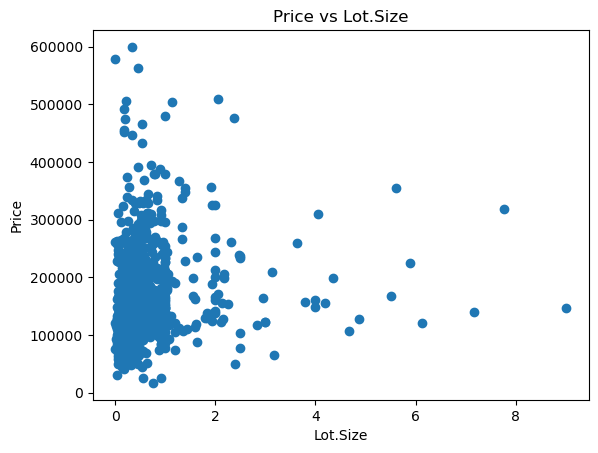

In [8]:
plt.scatter(x=df["Lot.Size"], y=df["Price"])
plt.xlabel('Lot.Size')
plt.ylabel('Price')
plt.title('Price vs Lot.Size'); # Set the x-axis tick labels to 0 and 1

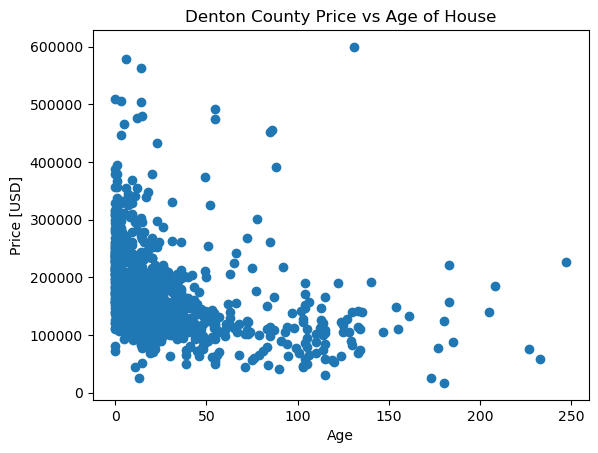

In [9]:
# Living Area vs Price
plt.scatter(x=df["Age"], y=df["Price"])
plt.xlabel("Age")
plt.ylabel("Price [USD]")
plt.title("Denton County Price vs Age of House");

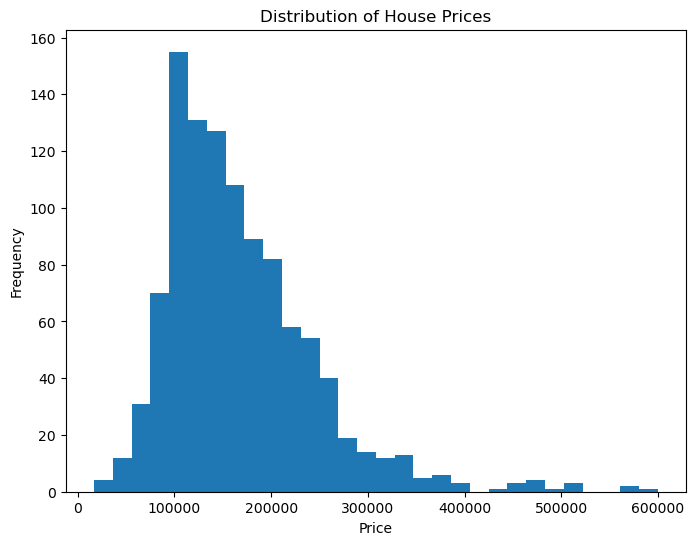

In [10]:
plt.figure(figsize=(8,6))
plt.hist(df["Price"], bins=30)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices");

#### Observations
 From the Above Visualization, the house prices are skewed more to the right than to the left

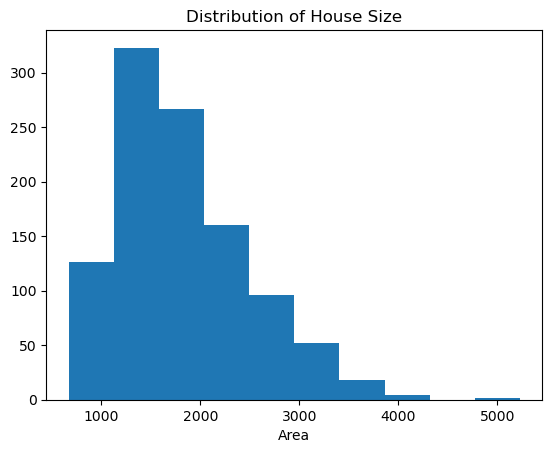

In [11]:
# Living Area Histogram
plt.hist(df["Living.Area"])
plt.xlabel("Area")
plt.title("Distribution of House Size");

#### Observation
From the above histogram, the house price seems to be skewed positively to the right.

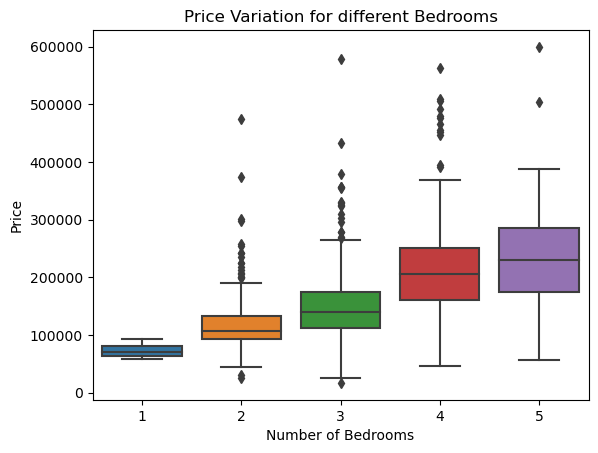

In [12]:
sns.boxplot(x="Bedrooms", y="Price", data=df)
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.title("Price Variation for different Bedrooms");

#### Observation
- There are a huge number of outliers in the number of bedrooms and prices. Also increase in bedrooms increases the price of the house.

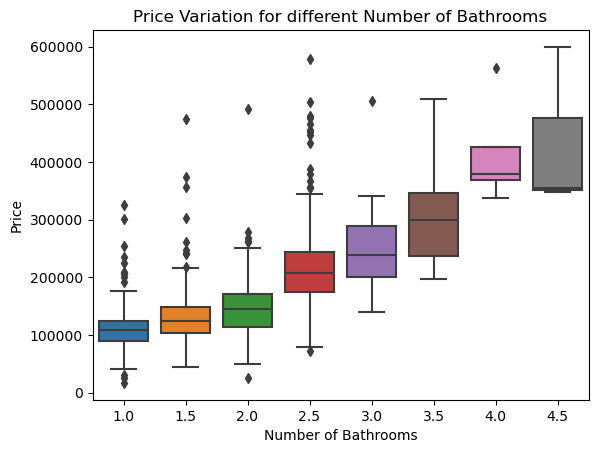

In [13]:
sns.boxplot(x="Bathrooms", y="Price", data=df)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price")
plt.title("Price Variation for different Number of Bathrooms");

#### Observation
Increase in No. of Bathrooms increases the price of a house

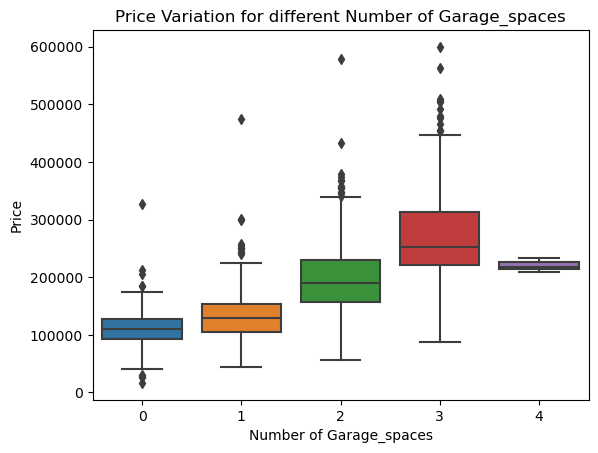

In [14]:
sns.boxplot(x="Garage_spaces", y="Price", data=df)
plt.xlabel("Number of Garage_spaces")
plt.ylabel("Price")
plt.title("Price Variation for different Number of Garage_spaces");

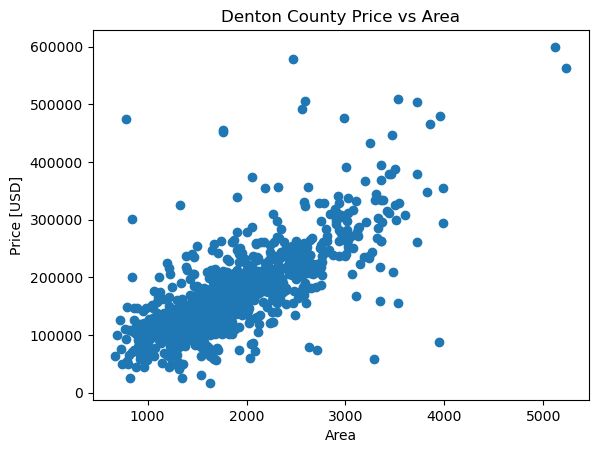

In [15]:
# Living Area vs Price
plt.scatter(x=df["Living.Area"], y=df["Price"])
plt.xlabel("Area")
plt.ylabel("Price [USD]")
plt.title("Denton County Price vs Area");

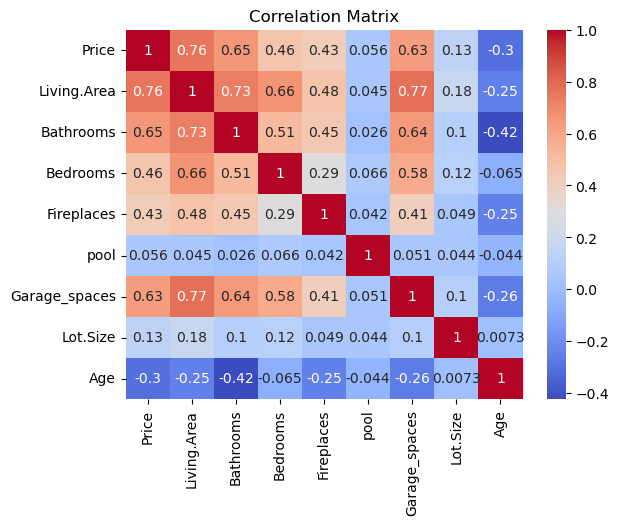

In [16]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix");

#### Observation
- From the Correlation Matrix above, there is a high positive correlation between <b>[Living.Area, Bathrooms and Garage_space]</b> and the price. Therefore an increase in <b>[Living.Area, Bathrooms and Garage_space]</b> leads to an increase in price of the house. <br>
- While there is a low or rather a negative correlation between <b>[pool, Lot.Size, Age] <b/> and the price. Therefore there is no Linear Relationship between <b>[pool, Lot.Size, Age] <b/> and price. <br>

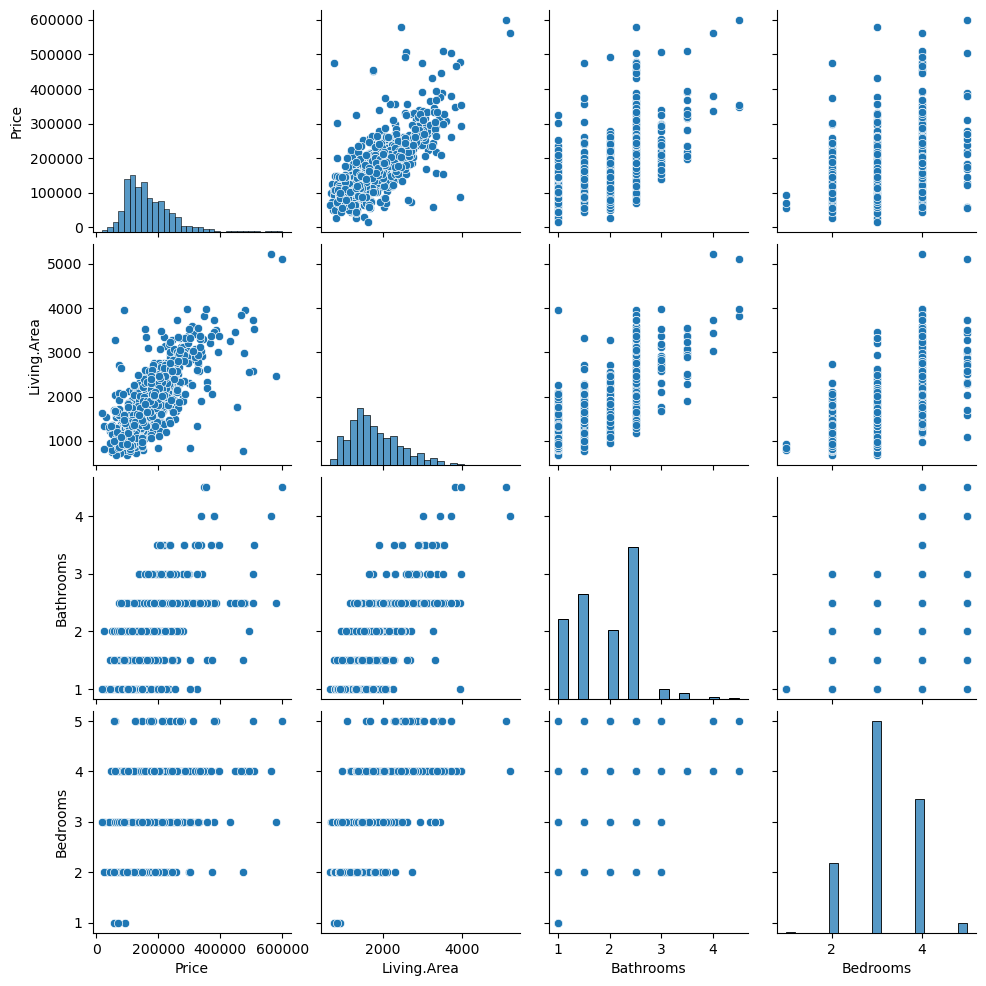

In [17]:
sns.pairplot(df[["Price", "Living.Area", "Bathrooms", "Bedrooms"]]);

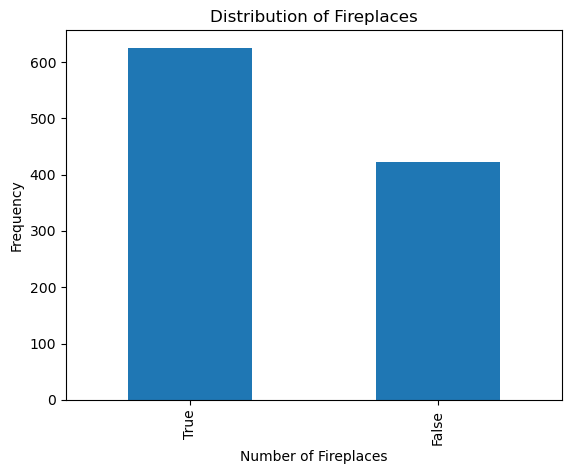

In [18]:
# Bar Chart
df["Fireplaces"].value_counts().plot(kind='bar')
plt.xlabel("Number of Fireplaces")
plt.ylabel("Frequency")
plt.title("Distribution of Fireplaces");

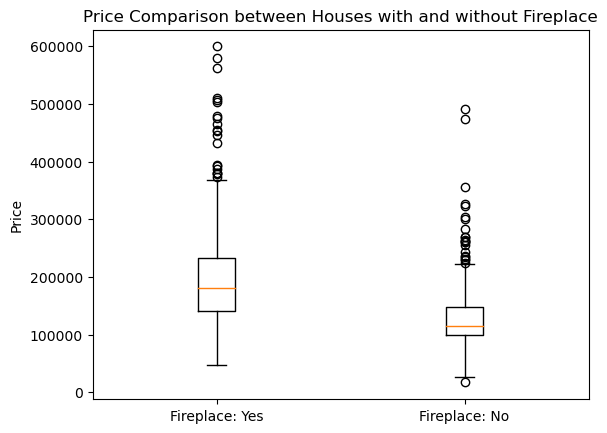

In [19]:
# Box plot
plt.boxplot([df[df['Fireplaces']==True]['Price'], df[df['Fireplaces']==False]['Price']], labels=['Fireplace: Yes', 'Fireplace: No'])
plt.ylabel('Price')
plt.title('Price Comparison between Houses with and without Fireplace');

#### Observation
- From the plot above, the median value of a house with a Fireplace is approximately 190,000, while a house without a Fireplace is approximately 105,000.<br>
This suggests that houses with Fireplaces are expensive compared to those without fireplace.
- Also there is an indication of Outliers from both Houses with and without Fireplaces.

### Machine Learning Model Building

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [21]:
# Separate features (X) and target variable (y)
X = df.drop('Price', axis=1)
y = df['Price']

In [22]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Define a mapping for encoding the boolean feature
mapping = {False: 0, True: 1}

# Map the boolean feature using the defined mapping
df['Fireplaces'] = df['Fireplaces'].map(mapping)

#### Baseline

In [24]:
y_mean = y_train.mean()
y_mean

166458.24582338904

In [25]:
y_pred_baseline = [y_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("Mean apt Price:", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt Price: 166458.25
Baseline MAE: 56843.97


#### Observation
- From the output above, if we always predicted that an apartment price is 166,458.25, our predictions would be off by an average of 56,843.97. It tells us that our model needs to have a mean absolute error below 56,843.97 in order to be useful.

In [26]:
# Define the pipeline with preprocessing steps and regression algorithm
pipeline_linear = make_pipeline(
    StandardScaler(),
    LinearRegression()
)


In [27]:
pipeline_rf = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [28]:
pipeline_svr = make_pipeline(
    StandardScaler(),
    SVR()
)


In [29]:
# Train and predict using each pipeline
pipeline_linear.fit(X_train, y_train)
y_pred_linear = pipeline_linear.predict(X_test)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
print('Linear Regression MAE: ', mae_linear)

pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print('Random Forest Regression MAE: ', mae_rf)

pipeline_svr.fit(X_train, y_train)
y_pred_svr = pipeline_svr.predict(X_test)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
print('Support Vector Regression MAE: ', mae_svr)

Linear Regression MAE:  31144.104226551986
Random Forest Regression MAE:  28351.113560317463
Support Vector Regression MAE:  59218.94403224209


#### Observation
 - From the output above, the Linear Regression and the Random Forest Regressor perfomed well and can be used to predict the house Prices,